In [3]:
# BEGIN USING PYPORTFOLIO OPT LIBRARY - Note I used all eleven sectors below

In [5]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os
import seaborn as sns
from dotenv import load_dotenv

from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import Plotting
from pypfopt import CLA
%matplotlib inline

In [6]:
#ALPACA data retrieval 
load_dotenv()

APCA_API_KEY_ID = os.getenv("APCA_API_KEY_ID")
APCA_SECRET_KEY = os.getenv("APCA_SECRET_KEY")

api = tradeapi.REST(APCA_API_KEY_ID, APCA_SECRET_KEY, api_version='v2')

type(APCA_API_KEY_ID)


str

In [7]:
#Use alpha vantage to get historic quotes for all S&P sectors. This goes back 20 years.

# Can only do 5 calls a minute or you will get error. Might have to wait a minute after
#running this cell. 

xlb_df = api.alpha_vantage.historic_quotes('XLB', adjusted=True, output_format='pandas')
#xlb_df.head()

xlk_df = api.alpha_vantage.historic_quotes('XLK', adjusted=True, output_format='pandas')
# xlk_df.tail()

rwr_df = api.alpha_vantage.historic_quotes('RWR', adjusted=True, output_format='pandas')
#rwr_df.head()

xli_df = api.alpha_vantage.historic_quotes('XLI', adjusted=True, output_format='pandas')
#rwr_df.head()

xly_df = api.alpha_vantage.historic_quotes('XLY', adjusted=True, output_format='pandas')
#xly_df.head()





In [8]:
#Might have to wait a minute before running this cell

xlp_df = api.alpha_vantage.historic_quotes('XLP', adjusted=True, output_format='pandas')
#xlp_df.head()

xle_df = api.alpha_vantage.historic_quotes('XLE', adjusted=True, output_format='pandas')
#xle_df.head()

xlf_df = api.alpha_vantage.historic_quotes('XLF', adjusted=True, output_format='pandas')
#xlf_df.head()

xlu_df = api.alpha_vantage.historic_quotes('XLU', adjusted=True, output_format='pandas')
#xlu_df.head()

xlv_df = api.alpha_vantage.historic_quotes('XLV', adjusted=True, output_format='pandas')
#xlv_df.head()

In [9]:

#Might have to wait a minute before running this cell

iyt_df = api.alpha_vantage.historic_quotes('IYT', adjusted=True, output_format='pandas')
#iyt_df.head()

In [10]:
xlu_df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-04-30,58.19,58.280,56.7300,57.26,57.26,19213783.0,0.0,1.0
2020-04-29,60.11,60.140,58.3700,58.61,58.61,11782714.0,0.0,1.0
2020-04-28,59.76,60.400,58.8778,59.15,59.15,14321700.0,0.0,1.0
2020-04-27,58.66,59.355,58.6000,58.93,58.93,12739948.0,0.0,1.0
2020-04-24,58.06,58.570,57.3100,58.32,58.32,11986857.0,0.0,1.0


In [11]:
#DATA CLEANUP

#Select the one column we need,  "adjusted close", and drop the others

xlb_df = xlb_df['5. adjusted close']
xlb_df.head()

xlk_df = xlk_df['5. adjusted close']
xlk_df.head()

rwr_df = rwr_df['5. adjusted close']
rwr_df.head()

xli_df = xli_df['5. adjusted close']
xli_df.head()

xly_df = xly_df['5. adjusted close']
xly_df.head()

xlp_df = xlp_df['5. adjusted close']
xlp_df.head()

xle_df = xle_df['5. adjusted close']
xle_df.head()

xlf_df = xlf_df['5. adjusted close']
xlf_df.head()

xlu_df = xlu_df['5. adjusted close']
xlu_df.head()

xlv_df = xlv_df['5. adjusted close']
xlv_df.head()

iyt_df = iyt_df['5. adjusted close']
iyt_df.head()


#Use concat to put the data in one dataframe
concat_df = pd.concat([xlb_df, xlk_df, rwr_df, xli_df, xly_df, xlp_df, xle_df, xlf_df, xlu_df, xlv_df, iyt_df], 
                      axis = "columns", join = "inner")
concat_df.head()



,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close
date,,,,,,,,,,,
2020-04-30,51.88,91.41,77.87,64.21,116.60,58.26,38.00,22.79,57.26,99.73,149.92
2020-04-29,53.47,91.82,79.10,65.51,117.33,58.96,38.86,23.38,58.61,100.19,154.40
2020-04-28,52.14,88.20,77.38,64.28,114.80,59.21,36.18,22.72,59.15,99.53,150.27
2020-04-27,51.19,89.39,76.08,63.10,114.35,58.88,35.37,22.48,58.93,101.58,148.90
2020-04-24,49.86,88.63,73.25,61.57,112.25,58.71,34.62,21.74,58.32,100.29,144.77


In [12]:
#Change column names to avoid confusion
columns = ['XLB', 'XLK', 'RWR', 'XLI', 'XLY', 'XLP', 'XLE', 'XLF', 'XLU', 'XLV', 'IYT']
concat_df.columns = columns
concat_df.head()

,XLB,XLK,RWR,XLI,XLY,XLP,XLE,XLF,XLU,XLV,IYT
date,,,,,,,,,,,
2020-04-30,51.88,91.41,77.87,64.21,116.60,58.26,38.00,22.79,57.26,99.73,149.92
2020-04-29,53.47,91.82,79.10,65.51,117.33,58.96,38.86,23.38,58.61,100.19,154.40
2020-04-28,52.14,88.20,77.38,64.28,114.80,59.21,36.18,22.72,59.15,99.53,150.27
2020-04-27,51.19,89.39,76.08,63.10,114.35,58.88,35.37,22.48,58.93,101.58,148.90
2020-04-24,49.86,88.63,73.25,61.57,112.25,58.71,34.62,21.74,58.32,100.29,144.77


In [13]:
#Sort earliest to latest 

concat_df.sort_index(inplace=True, ascending=True)
concat_df.head()


,XLB,XLK,RWR,XLI,XLY,XLP,XLE,XLF,XLU,XLV,IYT
date,,,,,,,,,,,
2003-10-10,15.6663,15.2225,24.9652,17.2546,23.4176,13.9255,16.9139,15.2858,12.1628,21.2388,42.1221
2003-10-13,15.8310,15.2692,25.0908,17.3261,23.6569,13.9785,16.9818,15.5271,12.2403,21.2993,42.7774
2003-10-14,15.9340,15.2303,25.1083,17.4118,23.7845,14.0515,16.9139,15.6190,12.2735,21.3296,43.0097
2003-10-15,15.9203,15.3238,25.0088,17.4404,23.6888,14.0316,16.6694,15.5788,12.1186,21.2842,42.6696
2003-10-16,15.9752,15.3783,25.1222,17.4476,23.7925,14.0515,16.8460,15.5960,12.1739,21.3977,42.8023


In [14]:
#check for nulls

concat_df.isnull().sum()

# Drop nulls
concat_df.dropna(inplace=True)

#count nulls again
concat_df.isnull().sum()

XLB    0
XLK    0
RWR    0
XLI    0
XLY    0
XLP    0
XLE    0
XLF    0
XLU    0
XLV    0
IYT    0
dtype: int64

In [15]:
# drop duplicates
concat_df.drop_duplicates(inplace=True)

In [16]:
#check counts
concat_df.count()

XLB    4167
XLK    4167
RWR    4167
XLI    4167
XLY    4167
XLP    4167
XLE    4167
XLF    4167
XLU    4167
XLV    4167
IYT    4167
dtype: int64

In [17]:
# Read in price data
#df = pd.read_csv("tests/resources/stock_prices.csv", parse_dates=True, index_col="date")

opt_df = concat_df



In [18]:
#Calculate covariance matrix, use ledoit wolf shrinkage which reduces extreme values

S = risk_models.CovarianceShrinkage(opt_df).ledoit_wolf()
S

,XLB,XLK,RWR,XLI,XLY,XLP,XLE,XLF,XLU,XLV,IYT
XLB,0.056558,0.038068,0.048367,0.042838,0.039065,0.021873,0.053626,0.052827,0.025453,0.027509,0.045283
XLK,0.038068,0.044767,0.041781,0.037044,0.037152,0.021764,0.040674,0.046877,0.023421,0.027342,0.038385
RWR,0.048367,0.041781,0.098297,0.046810,0.048299,0.026878,0.048869,0.075710,0.033525,0.030151,0.050642
XLI,0.042838,0.037044,0.046810,0.044834,0.038428,0.021961,0.044945,0.051915,0.023998,0.027360,0.045245
XLY,0.039065,0.037152,0.048299,0.038428,0.044153,0.021931,0.039787,0.051117,0.022691,0.026626,0.041859
XLP,0.021873,0.021764,0.026878,0.021961,0.021931,0.020935,0.022986,0.027420,0.019062,0.018631,0.022477
XLE,0.053626,0.040674,0.048869,0.044945,0.039787,0.022986,0.085477,0.055396,0.031579,0.030328,0.045085
XLF,0.052827,0.046877,0.075710,0.051915,0.051117,0.027420,0.055396,0.093148,0.029854,0.034509,0.055588
XLU,0.025453,0.023421,0.033525,0.023998,0.022691,0.019062,0.031579,0.029854,0.035259,0.020120,0.023814
XLV,0.027509,0.027342,0.030151,0.027360,0.026626,0.018631,0.030328,0.034509,0.020120,0.030564,0.027735


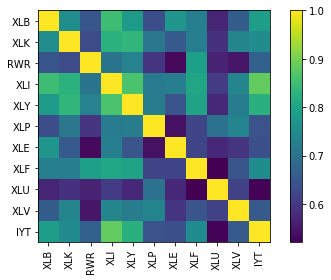

In [19]:
Plotting.plot_covariance(S);

In [20]:

# Calculate expected returns 
mu = expected_returns.mean_historical_return(opt_df)
#mu = expected_returns.capm_return(opt_df)

S = risk_models.CovarianceShrinkage(opt_df).ledoit_wolf()

# Optimize for maximum Sharpe ratio. The result is also referred to as the tangency portfolio, 
# as it is the portfolio for which the capital market line is tangent to the efficient frontier.

ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()

#If you want minimum volatility portfolio use: 
#raw_weights =ef.min_volatility()

#round weights
cleaned_weights = ef.clean_weights()

ef.save_weights_to_file("weights.csv")  

print(cleaned_weights)

ef.portfolio_performance(verbose=True)

{'XLB': 0.0, 'XLK': 0.26569, 'RWR': 0.0, 'XLI': 0.0, 'XLY': 0.0, 'XLP': 0.32729, 'XLE': 0.0, 'XLF': 0.0, 'XLU': 0.22731, 'XLV': 0.17971, 'IYT': 0.0}
Expected annual return: 11.1%
Annual volatility: 15.5%
Sharpe Ratio: 0.59


(0.11131719043966608, 0.15526908545037377, 0.588122163370714)

In [21]:
#Now convert weights into shares to buy given total portfolio value, say $20,000

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(opt_df)
da = DiscreteAllocation(raw_weights, latest_prices, total_portfolio_value=20000)
allocation, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
print(allocation)


Discrete allocation performed with $2.02 leftover
{'XLK': 58.0, 'XLP': 112.0, 'XLU': 80.0, 'XLV': 36.0}


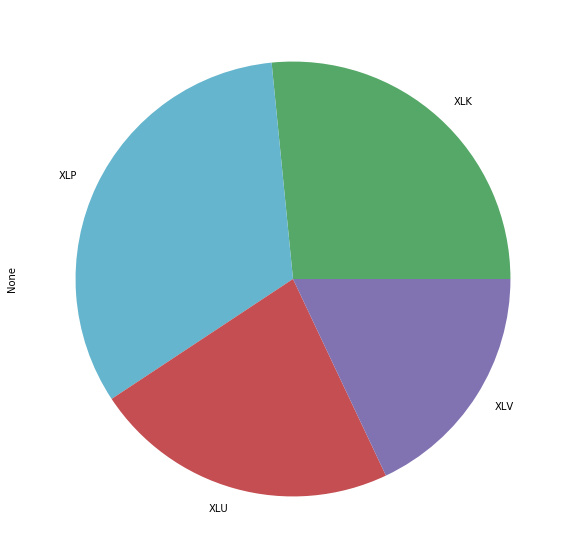

In [22]:
#Cam is not going to like this

pd.Series(cleaned_weights).plot.pie(figsize=(10,10))


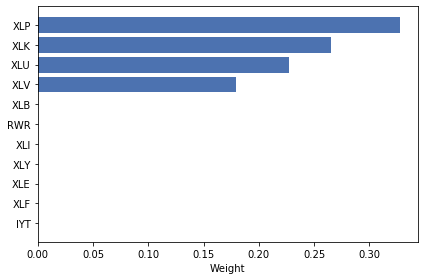

In [23]:
Plotting.plot_weights(cleaned_weights)